In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 32})
plt.rcParams["figure.figsize"] = (12,8)
import torch
import numpy as np
import scipy.signal
import scipy.io
import pandas as pd
import itertools
from itertools import product
import os
from tqdm.notebook import tqdm, trange

In [2]:
N_CLASSES = 40
N_POINTS  = 1250

In [3]:
storage_patrh = os.path.join(os.getcwd())
listfiles = os.listdir(storage_patrh)
list_featurestorage = [fname for fname in listfiles if fname.endswith(('csv','json')) ]
list_featurestorage

['EWT_LDA_TOLx.csv',
 'LDA_TSFEL_FULL.csv',
 'minirocket_lda.csv',
 'tsfel_rf_fs.csv']

In [212]:
df = pd.DataFrame()
tsfel_lda  = pd.read_csv('LDA_TSFEL_FULL.csv').drop(columns=['Unnamed: 0']).values.squeeze()
ewt_lda    = pd.read_csv('EWT_LDA_TOLx.csv'  ).drop(columns=['Unnamed: 0']).values.squeeze()
minirocket = pd.read_csv('minirocket_lda.csv').drop(columns=['Unnamed: 0']).values.squeeze()
tsfel_rf  = pd.read_csv('tsfel_rf_fs.csv'   ).drop(columns=['Unnamed: 0']).values.squeeze()


df = pd.DataFrame([tsfel_lda,ewt_lda,minirocket,tsfel_rf]).T
df.rename(columns={0: "tsfel_lda", 1: "ewt_lda",2:'minirocket_lda',3:'tsfel_rf_fs'})

,tsfel_lda,ewt_lda,minirocket_lda,tsfel_rf_fs
0,5,13,0,5
1,5,13,0,5
2,5,13,0,5
3,5,13,0,5
4,5,13,0,5
...,...,...,...,...
49995,39,39,39,39
49996,39,39,39,39
49997,39,39,39,39
49998,39,39,39,39


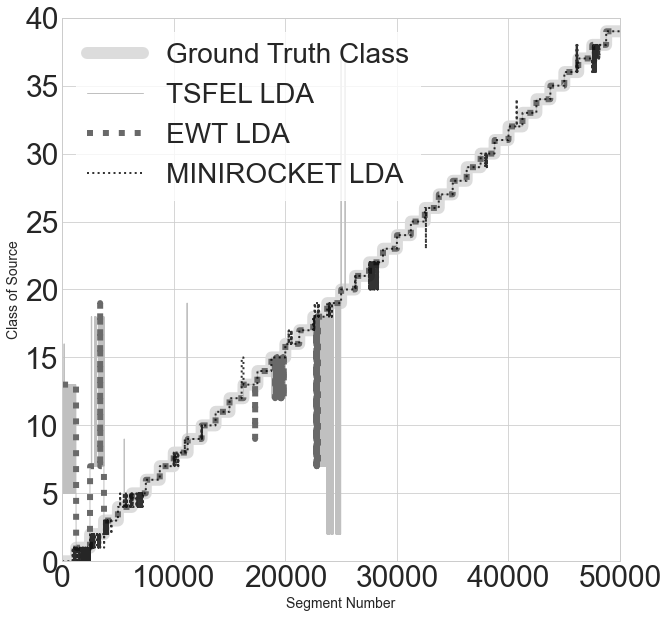

In [213]:
y = np.repeat(np.arange(N_CLASSES),N_POINTS)
fig, axs = plt.subplots(1,1,figsize=(10,10))

axs.plot(y,label='Ground Truth Class',
         linestyle='-', linewidth=12,color='gainsboro')
axs.plot(tsfel_lda, label='TSFEL LDA',
        linestyle='-', linewidth=1,color='silver')
axs.plot(ewt_lda, label='EWT LDA',
        linestyle=':', linewidth=6,color='dimgray', alpha=1)
axs.plot(minirocket, label='MINIROCKET LDA',
        linestyle=':', linewidth=2,color='black', alpha=0.8)

axs.set_xlabel('Segment Number')
axs.set_ylabel('Class of Source')
axs.tick_params(axis='both', which='major', labelsize=30)
axs.set_xlim([0, 50_000])
axs.set_ylim([0, 40])

# axs.set_title('Typical Signals ACF For Several Sources', fontsize = 28)

legend = axs.legend(ncol = 1, fontsize = 28, frameon = 1, loc = 'upper left')
frame = legend.get_frame()
frame.set_color('white')

plt.grid(True)
plt.savefig('ConfusionPlot.pdf', dpi=250, format='pdf', bbox_inches='tight' )
plt.show()


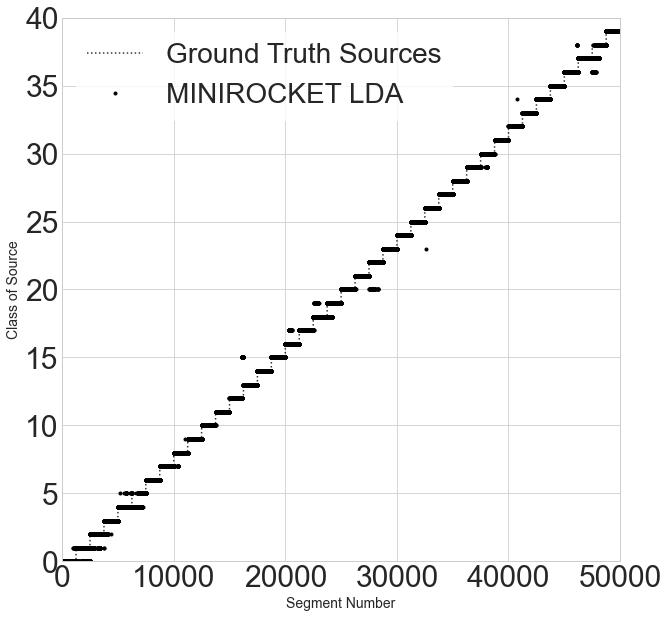

In [214]:
y = np.repeat(np.arange(N_CLASSES),N_POINTS)
n = np.arange(y.size)
fig, axs = plt.subplots(1,1,figsize=(10,10))

# axs.plot(y,label='Ground Truth Class',
#          linestyle='-', linewidth=12,color='gainsboro')
# axs.plot(tsfel_lda, label='TSFEL LDA',
#         linestyle='-', linewidth=1,color='silver')
# axs.plot(ewt_lda, label='EWT LDA',
#         linestyle=':', linewidth=6,color='dimgray', alpha=1)
axs.plot(n,y, label='Ground Truth Sources',color='black', linestyle=':', alpha=0.8)

axs.plot(n,minirocket, label='MINIROCKET LDA', linewidth=0, marker='o', markersize=3,  color='black', alpha=1)

axs.set_xlabel('Segment Number')
axs.set_ylabel('Class of Source')
axs.tick_params(axis='both', which='major', labelsize=30)
axs.set_xlim([0, 50_000])
axs.set_ylim([0, 40])

# axs.set_title('Typical Signals ACF For Several Sources', fontsize = 28)

legend = axs.legend(ncol = 1, fontsize = 28, frameon = 1, loc = 'upper left')
frame = legend.get_frame()
frame.set_color('white')

plt.grid(True)
plt.savefig('ConfusionPlotMiniROCKET.pdf', dpi=250, format='pdf', bbox_inches='tight' )
plt.show()

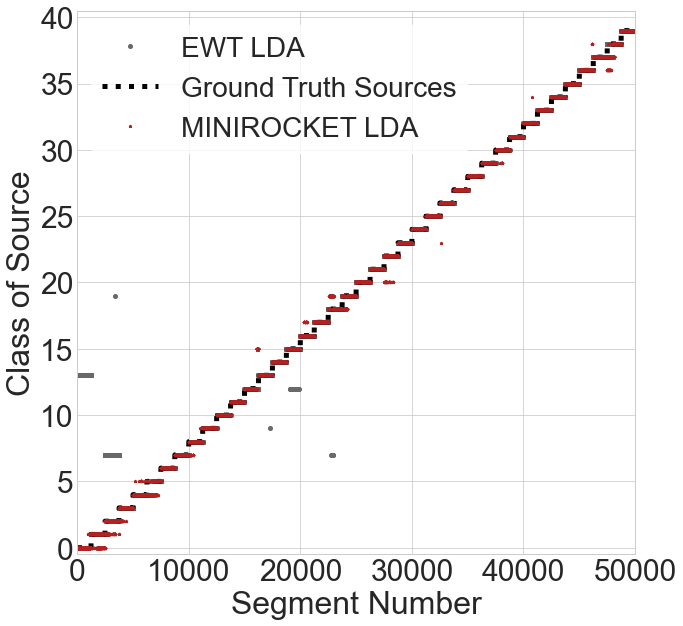

In [7]:
y = np.repeat(np.arange(N_CLASSES),N_POINTS)
n = np.arange(y.size)
fig, axs = plt.subplots(1,1,figsize=(10,10))

# axs.plot(y,label='Ground Truth Class',
#          linestyle='-', linewidth=12,color='gainsboro')
# axs.plot(tsfel_lda, label='TSFEL LDA',
#         linestyle='-', linewidth=1,color='silver')


axs.plot(ewt_lda, label='EWT LDA',
        linewidth=0, color='dimgray',marker='o', markersize=4,  alpha=1)

axs.plot(n,y, label='Ground Truth Sources',color='black', linestyle=':', linewidth = 5, alpha=1)

axs.plot(n,minirocket, label='MINIROCKET LDA', linewidth=0, marker='*', markersize=3,  color='firebrick', alpha=1)

axs.set_xlabel('Segment Number')
axs.set_ylabel('Class of Source')
axs.tick_params(axis='both', which='major', labelsize=30)
axs.set_xlim([0, 50_000])
axs.set_ylim([-0.5, 40.5])

# axs.set_title('Typical Signals ACF For Several Sources', fontsize = 28)

legend = axs.legend(ncol = 1, fontsize = 28, frameon = 1, loc = 'upper left')
frame = legend.get_frame()
frame.set_color('white')

plt.grid(True)
plt.savefig('ConfusionPlot_EWT_MINIROCKET.pdf', dpi=120, format='pdf', bbox_inches='tight' )
plt.show()

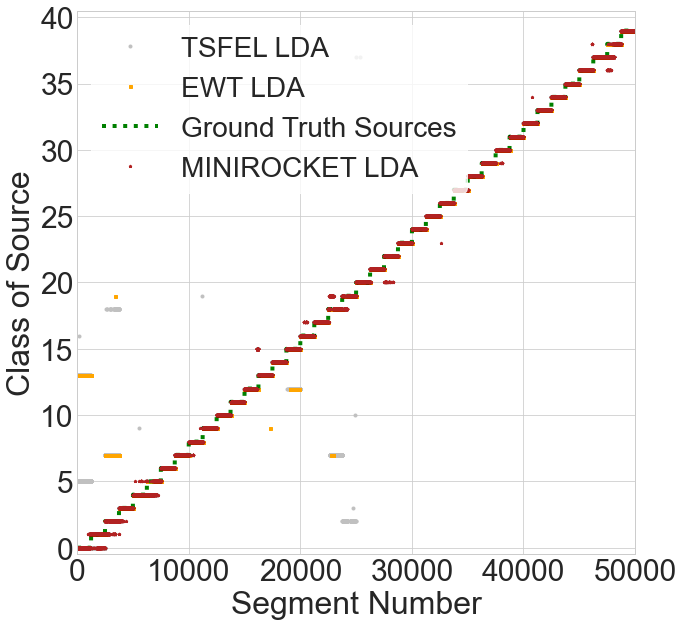

In [8]:
y = np.repeat(np.arange(N_CLASSES),N_POINTS)
n = np.arange(y.size)
fig, axs = plt.subplots(1,1,figsize=(10,10))

# axs.plot(y,label='Ground Truth Class',
#          linestyle='-', linewidth=12,color='gainsboro')


axs.plot(n,tsfel_lda, label='TSFEL LDA',
        linewidth=0, color='silver',marker='o', markersize=3,  alpha=1)

axs.plot(n,ewt_lda, label='EWT LDA',
        linewidth=0, color='orange',marker='s', markersize=3,  alpha=1)

axs.plot(n,y, label='Ground Truth Sources',color='green', linestyle=':', linewidth = 4, alpha=1)

axs.plot(n,minirocket, label='MINIROCKET LDA', linewidth=0, marker='*', markersize=3,  color='firebrick', alpha=1)

axs.set_xlabel('Segment Number')
axs.set_ylabel('Class of Source')
axs.tick_params(axis='both', which='major', labelsize=30)
axs.set_xlim([0, 50_000])
axs.set_ylim([-0.5, 40.5])

# axs.set_title('Typical Signals ACF For Several Sources', fontsize = 28)

legend = axs.legend(ncol = 1, fontsize = 28, frameon = 1, loc = 'upper left')
frame = legend.get_frame()
frame.set_color('white')

plt.grid(True)
plt.savefig('ConfusionPlot.pdf', dpi=120, format='pdf', bbox_inches='tight' )
plt.show()

[[1147  103    0 ...    0    0    0]
 [ 329  921    0 ...    0    0    0]
 [   0  231 1019 ...    0    0    0]
 ...
 [   0    0    0 ... 1250    0    0]
 [   0    0    0 ...  508  684    0]
 [   0    0    0 ...    0    0 1250]]


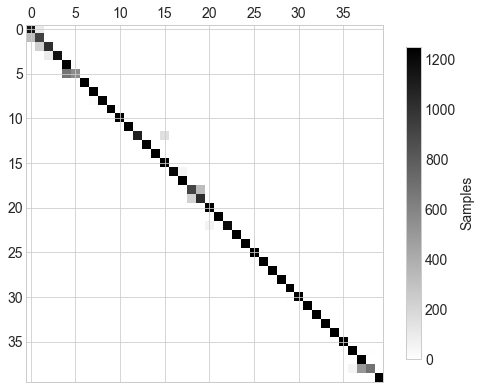

In [215]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y, minirocket)

print(cf_matrix)

# cf_matrix_plot = 255- cf_matrix
# cf_matrix_plot[cf_matrix_plot>=254] = 0
plt.matshow(cf_matrix, cmap="binary")
plt.colorbar(label="Samples", orientation="vertical", shrink=0.7)
plt.show()

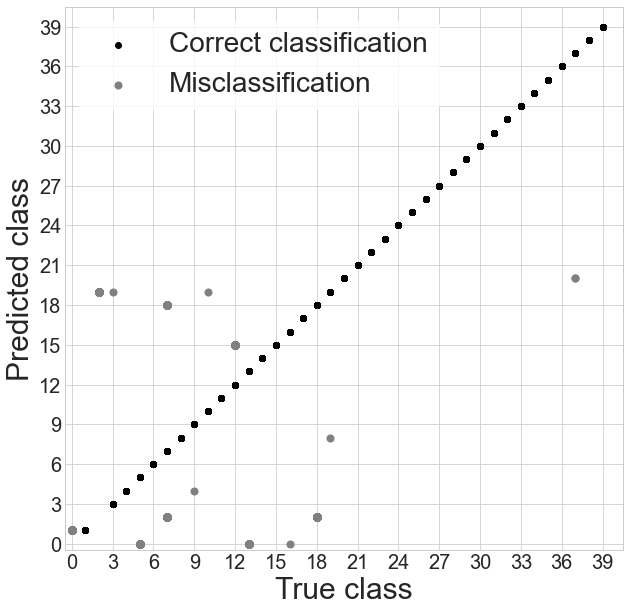

In [216]:

plt.figure(figsize = (10,10))
plt.scatter(tsfel_lda[tsfel_lda==y], y[tsfel_lda==y], c ='black', label='Correct classification' )
plt.scatter(tsfel_lda[tsfel_lda!=y], y[tsfel_lda!=y], c ='grey', s=50,label='Misclassification' )
plt.xlabel('True class', fontsize=30)
plt.ylabel('Predicted class', fontsize=30)
plt.xlim(-0.5,40.5)
plt.ylim(-0.5,40.5)
plt.xticks(np.arange(0, 40, step=3), fontsize=20)
plt.yticks(np.arange(0, 40, step=3), fontsize=20)

legend = plt.legend(ncol = 1, fontsize = 28, frameon = 1, loc = 'upper left')
frame = legend.get_frame()
frame.set_color('white')
# plt.colorbar(label="Samples", orientation="vertical", shrink=0.7)
plt.show()

In [217]:
true_preidcts = np.diag(cf_matrix)
false_predicts = cf_matrix-np.diag(true_preidcts)

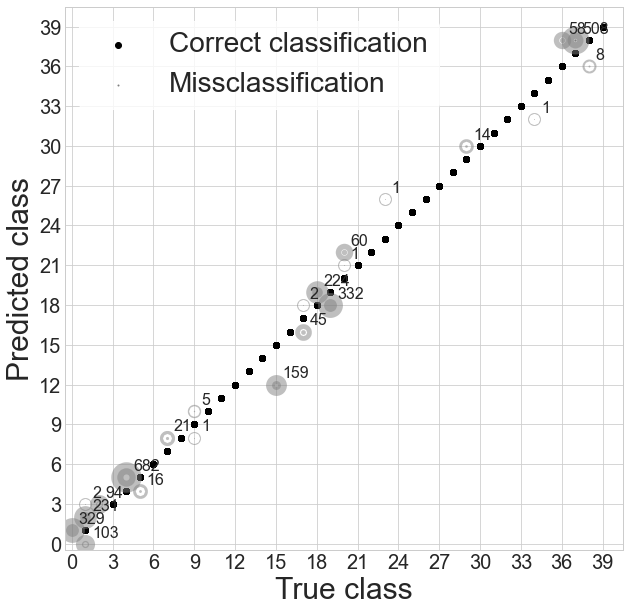

In [218]:

plt.figure(figsize = (10,10))


plt.scatter(tsfel_lda[tsfel_lda==y], y[tsfel_lda==y], c ='black', label='Correct classification' )


for idx in np.transpose(np.nonzero(false_predicts)):
    size = false_predicts[idx[0],idx[1]]
    plt.scatter(idx[1], idx[0], c ='grey', s=max(1,size//2), linewidths=12, alpha=0.5)
    plt.text(idx[1]+0.5, idx[0]+0.5, str(size), fontsize=16)

plt.scatter(idx[1], idx[0], c ='grey', s=1, label='Missclassification')    

plt.xlabel('True class', fontsize=30)
plt.ylabel('Predicted class', fontsize=30)
plt.xlim(-0.5,40.5)
plt.ylim(-0.5,40.5)
plt.xticks(np.arange(0, 40, step=3), fontsize=20)
plt.yticks(np.arange(0, 40, step=3), fontsize=20)

legend = plt.legend(ncol = 1, fontsize = 28, frameon = 1, loc = 'upper left')
frame = legend.get_frame()
frame.set_color('white')
# plt.colorbar(label="Samples", orientation="vertical", shrink=0.7)
plt.show()

In [326]:
def plot_confusion(y_true, y_perdict, name, 
                   figsize = (16,7), 
                   shift_text = (-0.7, 1.2), 
                   threshold_text = 50, 
                   title_in_legend = False, size_legend = True ):
    cf_matrix = confusion_matrix(y_true, y_perdict)
    true_preidcts = np.diag(cf_matrix)
    false_predicts = cf_matrix-np.diag(true_preidcts)

    fig, ax = plt.subplots(figsize = figsize)

    flag_zeros = False

    # TRUE
    for idx in range(40):
        size = true_preidcts[idx]
        ax.scatter(idx, idx, c ='black', s=min(size,50), alpha=1.0,  marker='s',)

        if size ==0:
            flag_zeros = True
            ax.scatter(idx, idx, c ='white', s=60, linewidths=1, linestyle=':', edgecolors='black', alpha=1.0,  marker='s',)
    #     if size!=1250:
    #         ax.text(idx+0.5, idx-0.5, str(size), fontsize=12)
    l1 = ax.scatter(-10, -10, c ='black', s=80, marker='s', label='Correct classification')     

    #FALSE
    for idx in np.transpose(np.nonzero(false_predicts)):
        size = false_predicts[idx[0],idx[1]]
        ax.scatter(idx[0], idx[1], c ='grey', s=max(1,size//2), linewidths=2, alpha=0.5, edgecolors='black')
        if size>threshold_text:
            ax.text(idx[0]+shift_text[0], idx[1]+shift_text[1], str(size), fontsize=15)
    l2 = ax.scatter(-10, -10, c ='grey', s=80, label='Missclassification')

    ax.set_xlabel('True class', fontsize=30)
    ax.set_ylabel('Predicted class', fontsize=30)
    ax.set_xlim(-0.5,40.5)
    ax.set_ylim(-0.5,40.5)
    ax.set_xticks(np.arange(0, 40, step=4))
    ax.set_yticks(np.arange(0, 40, step=4))
    ax.tick_params(axis="both", labelsize=20)

    ax.minorticks_on()
    # ax.grid(which='major', color = 'darkgrey')
    ax.grid(which='minor', color = 'silver', linestyle = ':')

    legend = ax.legend(ncol = 1, fontsize = 24, frameon = 1, loc = 'upper left', title = (f'{name}'),fancybox = True)
    frame = legend.get_frame()
    frame.set_color('white')
    plt.setp(legend.get_title(),fontsize=28 if title_in_legend else 0)
    
    if size_legend:
        ax2 = ax.twinx()
        l3 = ax2.scatter(-10, -10, c ='grey', s=10, linewidths=2, alpha=0.5, edgecolors='black', label='Small amount')
        l4 = ax2.scatter(-10, -10, c ='grey', s=100, linewidths=2, alpha=0.5, edgecolors='black', label='Medium amount')
        l5 = ax2.scatter(-10, -10, c ='grey', s=500, linewidths=2, alpha=0.5, edgecolors='black', label='Large amount')
        if flag_zeros:
            l6 = ax2.scatter(-10, -10, c ='white', s=80, linewidths=1, linestyle=':', edgecolors='black', alpha=1.0,  marker='s', label='Zero Correct Classification')
        ax2.get_yaxis().set_visible(False)

        legend2 = ax2.legend(ncol = 1, fontsize = 15, frameon = 1, loc = 'lower right', title = "Missclassification amount",fancybox = False, shadow = False)
        frame = legend.get_frame()
        frame.set_color('white')
        plt.setp(legend2.get_title(),fontsize=18)

#     ax.set_title(f'{name}')

    plt.grid(True)
    plt.savefig(f'ConfusionPlot_{name.replace(" ", "_")}.pdf', dpi=120, format='pdf', bbox_inches='tight' )
    plt.show()

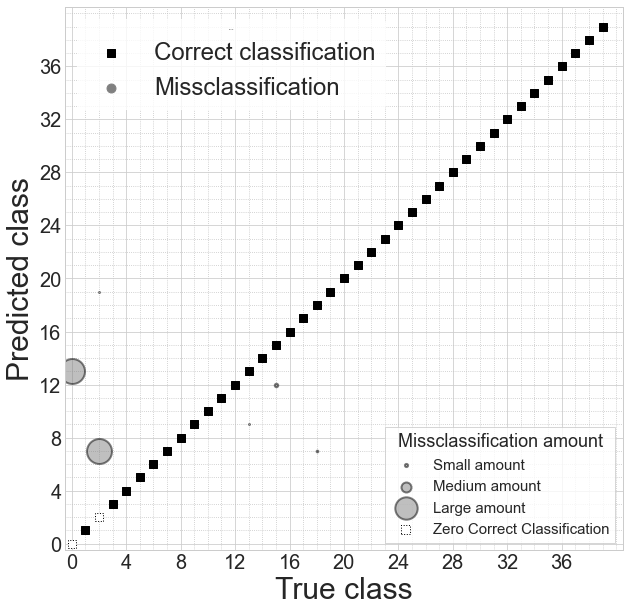

In [327]:
plot_confusion(y, ewt_lda, 'EWT LDA',figsize = (10,10), threshold_text = 10004 )

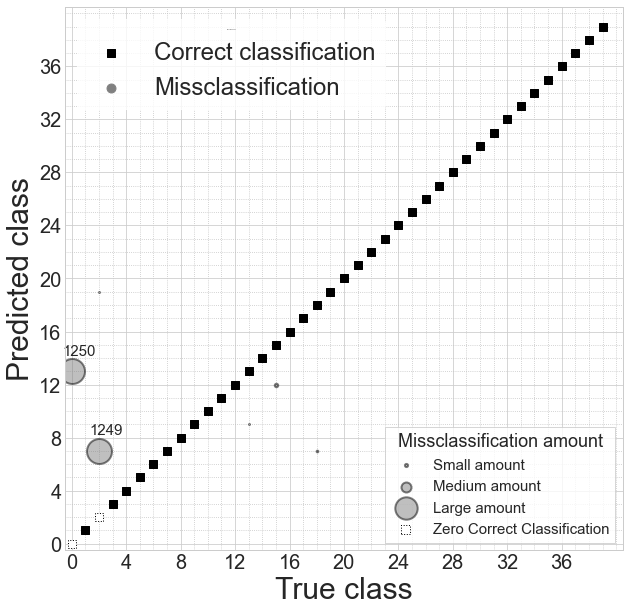

In [332]:
plot_confusion(y, ewt_lda, 'EWT LDA Numbers',figsize = (10,10), threshold_text = 100, )

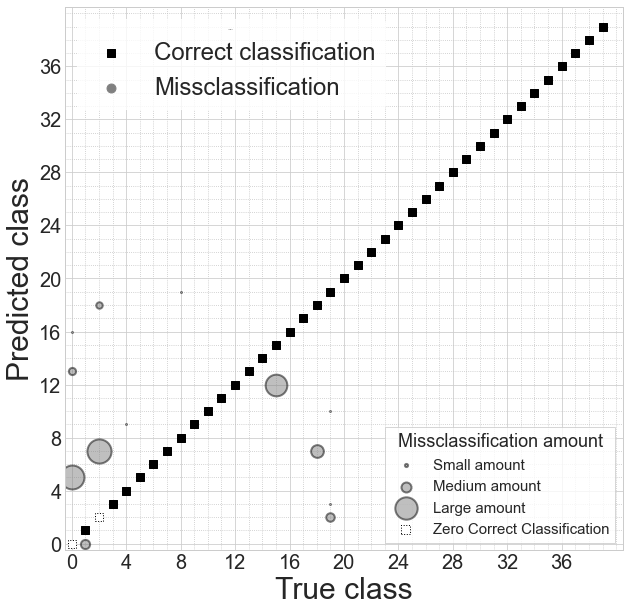

In [322]:
plot_confusion(y, tsfel_lda, 'TSFEL LDA',figsize = (10,10), threshold_text = 10004 )

In [ ]:
plot_confusion(y, ewt_lda, 'EWT LDA WOSIZE',figsize = (10,10), threshold_text = 100, size )

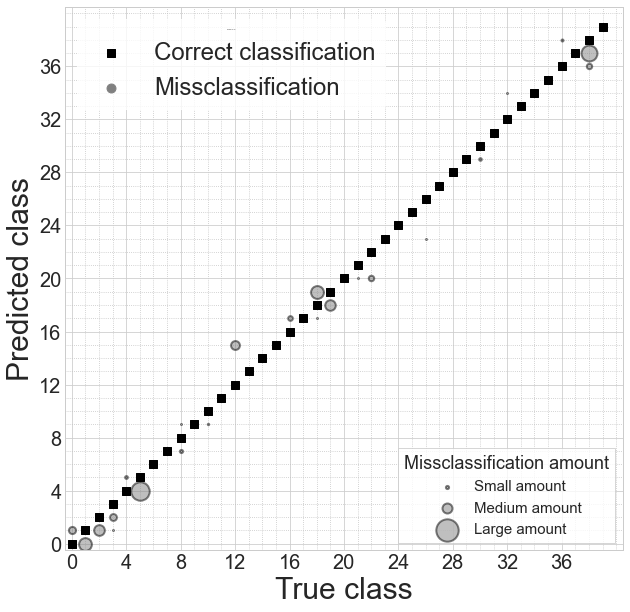

In [323]:
plot_confusion(y, minirocket, 'MINIROCKET LDA',figsize = (10,10), shift_text=(+0.5, -0.2), threshold_text = 10004 )

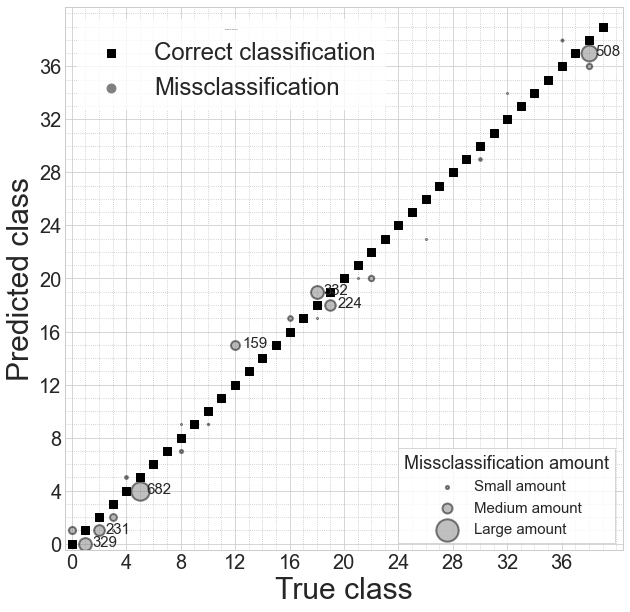

In [325]:
plot_confusion(y, minirocket, 'MINIROCKET LDA Numbers',figsize = (10,10), shift_text=(+0.5, -0.2), threshold_text = 105 )

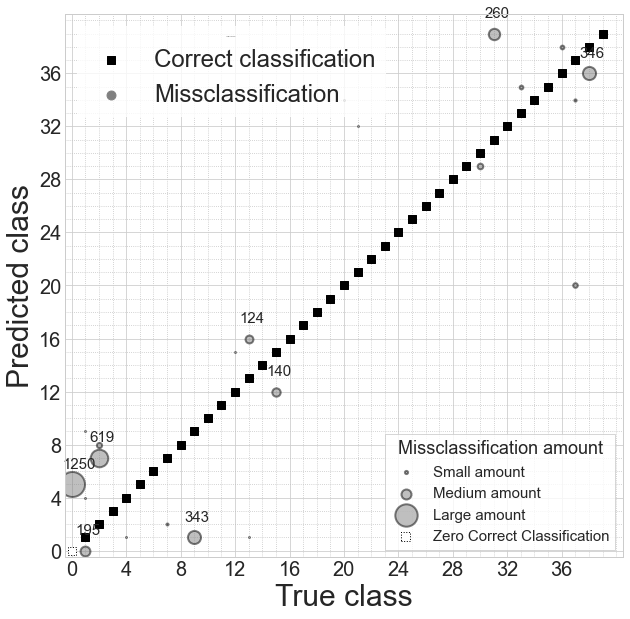

In [333]:
plot_confusion(y, tsfel_rf, 'TSFEL LDA Numbers',figsize = (10,10), threshold_text = 100, )

<AxesSubplot:>

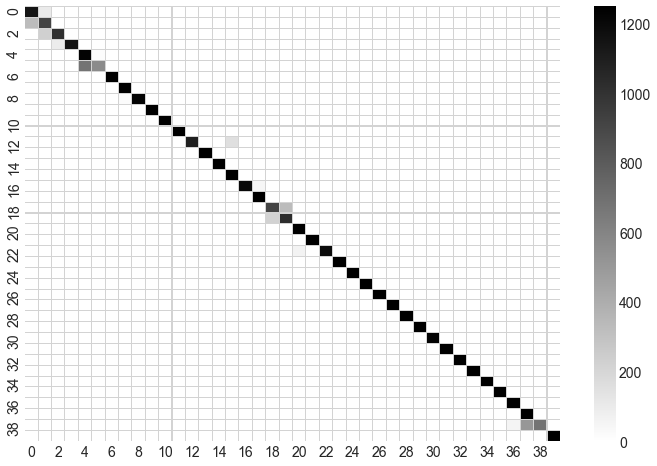

In [219]:
df_cm = pd.DataFrame(cf_matrix)
import seaborn as sns; 
sns.heatmap(df_cm, annot=False, linewidths=.05, linecolor='lightgray',  cmap="binary")


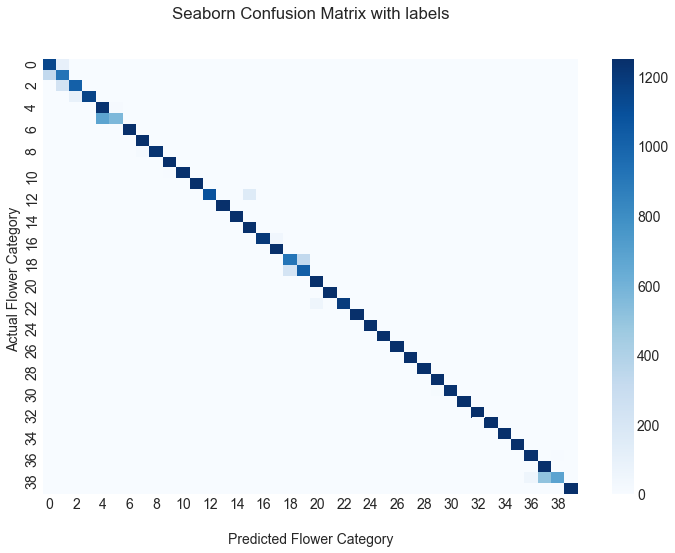

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=False, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(np.arange(40))
# ax.yaxis.set_ticklabels(np.arange(40))

## Display the visualization of the Confusion Matrix.
plt.show()

https://matplotlib.org/stable/gallery/color/named_colors.html

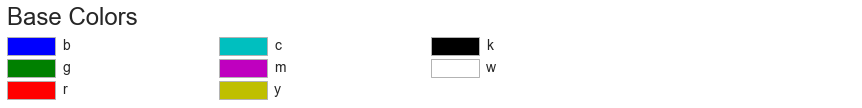

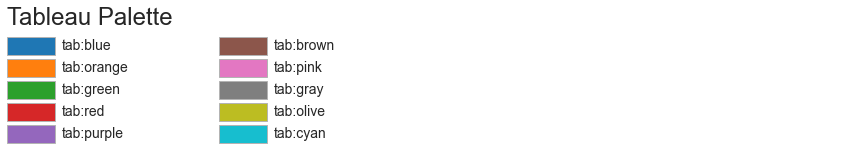

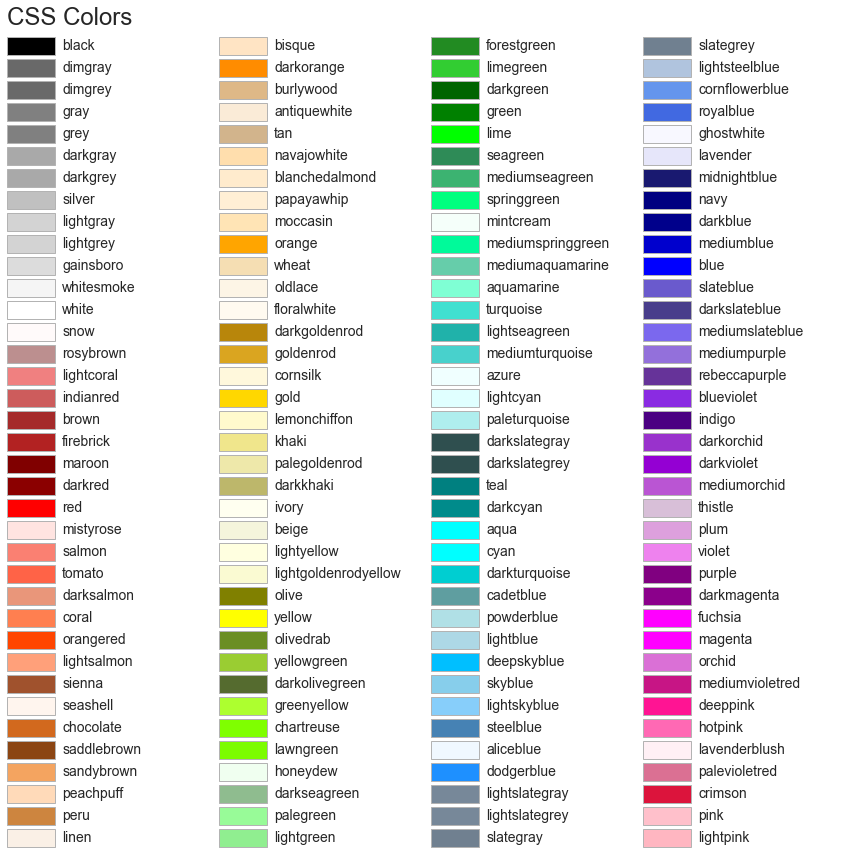

In [15]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# from colorspacious import cspace_converter

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

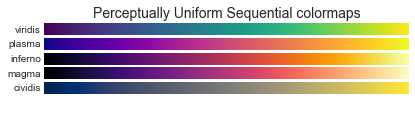

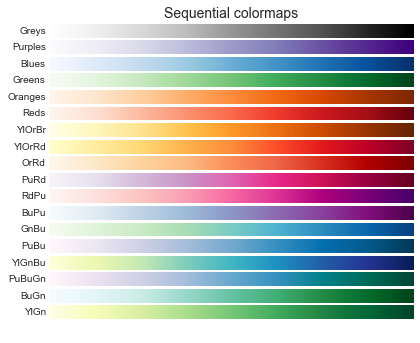

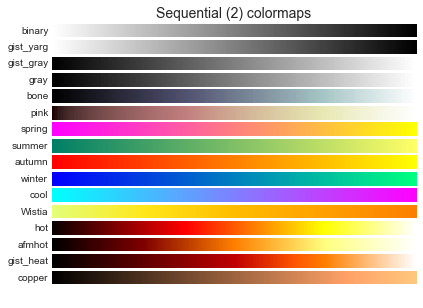

In [17]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

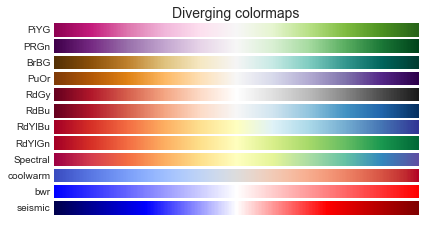

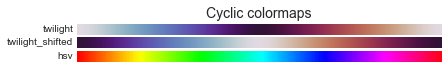

In [18]:
plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

NameError: name 'cspace_converter' is not defined

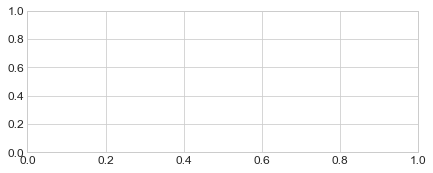

In [19]:
mpl.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(nrows=nsubplots, squeeze=False,
                            figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axs.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = cm.get_cmap(cmap)(x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

NameError: name 'cspace_converter' is not defined

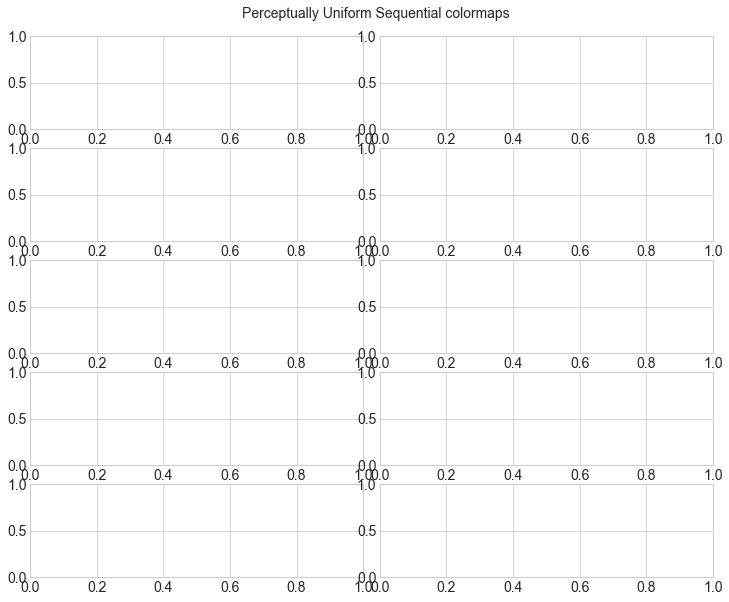

In [20]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = cm.get_cmap(plt.get_cmap(name))(x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)